In [98]:
import pandas as pd
import numpy as np
import xmltodict
import os 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
#parse XML to cit
with open('C:\\Users\\Alicia\\data-scientist-exercise02\\data\AviationData.xml') as fd:
    doc = xmltodict.parse(fd.read())

In [4]:
#get the column names to iterate through the dictionary
colnames =[]
for key, value in doc['DATA']['ROWS']['ROW'][0].items():
    colnames.append(key[1:])
    
colnames

['EventId',
 'InvestigationType',
 'AccidentNumber',
 'EventDate',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'AirportCode',
 'AirportName',
 'InjurySeverity',
 'AircraftDamage',
 'AircraftCategory',
 'RegistrationNumber',
 'Make',
 'Model',
 'AmateurBuilt',
 'NumberOfEngines',
 'EngineType',
 'FARDescription',
 'Schedule',
 'PurposeOfFlight',
 'AirCarrier',
 'TotalFatalInjuries',
 'TotalSeriousInjuries',
 'TotalMinorInjuries',
 'TotalUninjured',
 'WeatherCondition',
 'BroadPhaseOfFlight',
 'ReportStatus',
 'PublicationDate']

In [ ]:
%%time 

#load in xml data into a dataframe called DF and print each 1000 iterations so we can track this 

#start-time : 4:33 

#create blank dataframe to append data to
df = pd.DataFrame(columns = colnames)

#get row values for each one:
for x in range(len(doc['DATA']['ROWS']['ROW'])):
    rowvals = []
    for key, value in doc['DATA']['ROWS']['ROW'][x].items():
        rowvals.append(value)

    a_series = pd.Series(rowvals, index = df.columns)
    df = df.append(a_series, ignore_index=True)
    
    if x % 1000 == 0: 
        print (x)
    
df

In [77]:
#create a CSV of this data
df.to_csv('complete_accident_data.csv')

In [7]:
#read the CSV of the data in 
df = pd.read_csv("complete_accident_data.csv", index_col=[0])

In [8]:
df.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,PurposeOfFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate
0,20150901X74304,Accident,GAA15CA244,9/1/2015,"Truckee, CA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN
1,20150901X92332,Accident,CEN15LA392,8/31/2015,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,...,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,LANDING,Preliminary,9/4/2015
2,20150902X61853,Accident,GAA15CA246,8/30/2015,"New Milford, CT",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN
3,20150901X02521,Accident,GAA15CA243,8/30/2015,"New Enterprise, PA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN
4,20150831X61356,Accident,GAA15CA242,8/29/2015,"MIDLOTHIAN, TX",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN


In [21]:
df.shape

(77257, 31)

In [19]:
#load all jsons into a single dataframe

os.chdir('C:\\Users\\Alicia\\data-scientist-exercise02\\data')

files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('json')]
merged = []

for f in files:
    filename, ext = os.path.splitext(f)
    if ext == '.json':
        read = pd.read_json(f, orient='split')
        merged.append(read)

result = pd.concat(merged)

result.to_csv('merged_jsons.csv')

In [20]:
#merge both dataframes to create a dataframe that contains all the accident data from .xml as well as all data from .json

,EventId,narrative,probable_cause
0,20070804X01107,NTSB investigators may not have traveled in su...,the pilot's failure to maintain clearance with...
1,20001208X09357,NTSB investigators either traveled in support ...,The pilot's failure to maintain adequate airsp...
2,20001212X23867,NTSB investigators may not have traveled in su...,FAILURE OF THE FREE TURBINE INTERMEDIATE PINIO...
3,20001214X37502,NTSB investigators may not have traveled in su...,
4,20001206X02609,NTSB investigators either traveled in support ...,Improper loading of the airplane. Contributin...
...,...,...,...
129,20001208X05741,NTSB investigators may not have traveled in su...,the pilot's failure to maintain clearance with...
130,20001213X34812,NTSB investigators may not have traveled in su...,
131,20001214X44746,NTSB investigators may not have traveled in su...,
132,20001211X12546,THE AIRPLANE'S RIGHT ENGINE LOST POWER SHORTLY...,the failure of the piston assembly in the numb...


In [46]:
final = pd.merge(df, result,on='EventId',how='outer')

In [47]:
final.shape

(77257, 33)

In [27]:
final.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate,narrative,probable_cause
0,20150901X74304,Accident,GAA15CA244,9/1/2015,"Truckee, CA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN,,
1,20150901X92332,Accident,CEN15LA392,8/31/2015,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,...,NaN,NaN,NaN,2.0,VMC,LANDING,Preliminary,9/4/2015,"On August 31, 2015, about 1230 central dayligh...",
2,20150902X61853,Accident,GAA15CA246,8/30/2015,"New Milford, CT",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN,,
3,20150901X02521,Accident,GAA15CA243,8/30/2015,"New Enterprise, PA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN,,
4,20150831X61356,Accident,GAA15CA242,8/29/2015,"MIDLOTHIAN, TX",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN,,


In [28]:
#export data, containing both XML and JSON data
final.to_csv("all_data.csv")

# begin analysis on final dataframe

- Perform initial exploratory analysis of the narrative text. What, if anything, can you learn from analyzing the text that you cannot learn from the structured data fields?
- After removing common stopwords, what are the most frequent terms in the narrative text? Do the word frequencies change over time?

In [48]:
final

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate,narrative,probable_cause
0,20150901X74304,Accident,GAA15CA244,9/1/2015,"Truckee, CA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN,,
1,20150901X92332,Accident,CEN15LA392,8/31/2015,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,...,NaN,NaN,NaN,2.0,VMC,LANDING,Preliminary,9/4/2015,"On August 31, 2015, about 1230 central dayligh...",
2,20150902X61853,Accident,GAA15CA246,8/30/2015,"New Milford, CT",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN,,
3,20150901X02521,Accident,GAA15CA243,8/30/2015,"New Enterprise, PA",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN,,
4,20150831X61356,Accident,GAA15CA242,8/29/2015,"MIDLOTHIAN, TX",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77252,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,9/19/1996,NTSB investigators may not have traveled in su...,IN-FLIGHT COLLISION WITH TERRAIN FOR UNKNOWN R...
77253,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,CRUISE,Probable Cause,NaN,NTSB investigators may not have traveled in su...,THE PILOTS ATTEMPTED VFR FLIGHT IN IMC CONDITI...
77254,20130128X92153,Accident,WPR12TA445,NaN,"Unknown, UN",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,2/8/2013,"On January 28, 2013, the National Transportati...",
77255,20010711X01367,Incident,DCA00WA063,NaN,"Cuzco, Peru",Peru,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,7/12/2001,The foreign authority was the source of this i...,


# sample from probable cause (10% of entire sample)

In [80]:
%%time 
sample = final.probable_cause.sample(frac=0.1, random_state=42)


#create a giant string to store all the information from the narrative inside
#prepare so that we can divide the text into words alter and remove stopwords
y=0
dfstring = ""
for x in sample: 
    if len(x) > 0: 
        dfstring += x
    y += 1
    if y % 1000 == 0:
        print (y)


1000
2000
3000
4000
5000
6000
7000
Wall time: 133 ms


In [83]:
%%time 
#real thing

#tokenize and get rid of punctuation.
tokens = RegexpTokenizer(r'\w+').tokenize(dfstring)

Wall time: 423 ms


In [84]:
len(tokens)

134909

In [86]:
%%time 
#convert all the strings to lowercase.
lowercasetokens = [each_string.lower() for each_string in tokens]

#get rid of stopwords.
y = 0
tokens_no_sw = []
for word in lowercasetokens:
    if not word in stopwords.words():
        tokens_no_sw.append(word)
    y+=1
    if y % 1000 == 0:
        print(y)
        

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
Wall time: 14min 17s


In [96]:
%%time 

#porter stem the words! 

Stem_words = []
ps =PorterStemmer()
y = 0
for w in tokens_no_sw:
    rootWord=ps.stem(w)
    Stem_words.append(rootWord)
    y += 1
    if y % 1000 == 0:
        print(y)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
Wall time: 1.98 s


In [ ]:
#save as a dataframe of stemmed words
pd.DataFrame(Stem_words).to_csv("Stem_words.csv")

In [106]:
#create a dictionary to hold all the words

word_dict = {}

for x in Stem_words:
    if x not in word_dict.keys(): 
        word_dict[x] = 1
    else: 
        word_dict[x] += 1

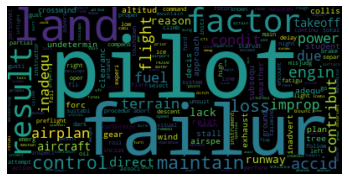

In [108]:
#generate a word cloud from the word frequencies found in the dictionary
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=word_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [112]:
#the most common words over the 10% sample that we investigated 
dict(sorted(word_dict.items(), key=lambda item: item[1], reverse=True))

{'pilot': 4530,
 'failur': 3000,
 'land': 2088,
 'factor': 2061,
 'result': 1847,
 'maintain': 1688,
 'control': 1491,
 'loss': 1322,
 'accid': 1252,
 'engin': 1177,
 'flight': 1142,
 'power': 1038,
 'condit': 1005,
 'fuel': 952,
 'inadequ': 931,
 'contribut': 916,
 'airplan': 904,
 'terrain': 882,
 'improp': 807,
 'due': 774,
 'direct': 647,
 'aircraft': 589,
 'takeoff': 563,
 'runway': 496,
 'lack': 489,
 'reason': 471,
 'undetermin': 448,
 'wind': 445,
 'altitud': 437,
 'relat': 415,
 'subsequ': 408,
 'stall': 407,
 'airspe': 400,
 'decis': 396,
 'adequ': 395,
 'collis': 385,
 'clearanc': 379,
 'inadvert': 370,
 'gear': 357,
 'student': 352,
 'forc': 352,
 'approach': 317,
 'weather': 305,
 'plan': 303,
 'exhaust': 281,
 'tree': 278,
 'crosswind': 274,
 'ground': 272,
 'preflight': 269,
 'roll': 259,
 'proper': 254,
 'total': 252,
 'compens': 249,
 'low': 248,
 'oper': 244,
 'system': 243,
 'use': 242,
 'command': 241,
 'instructor': 235,
 'ice': 231,
 'maneuv': 226,
 'flare': 219,


In [133]:
#save in a file just to make sure we have these for future reference
aviation_word_counts = pd.DataFrame.from_dict(list(word_dict.items()))
aviation_word_counts.to_csv("aviation_word_counts.csv")